<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/ML_Learning_101_Ensemble_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Concept

### Bagging

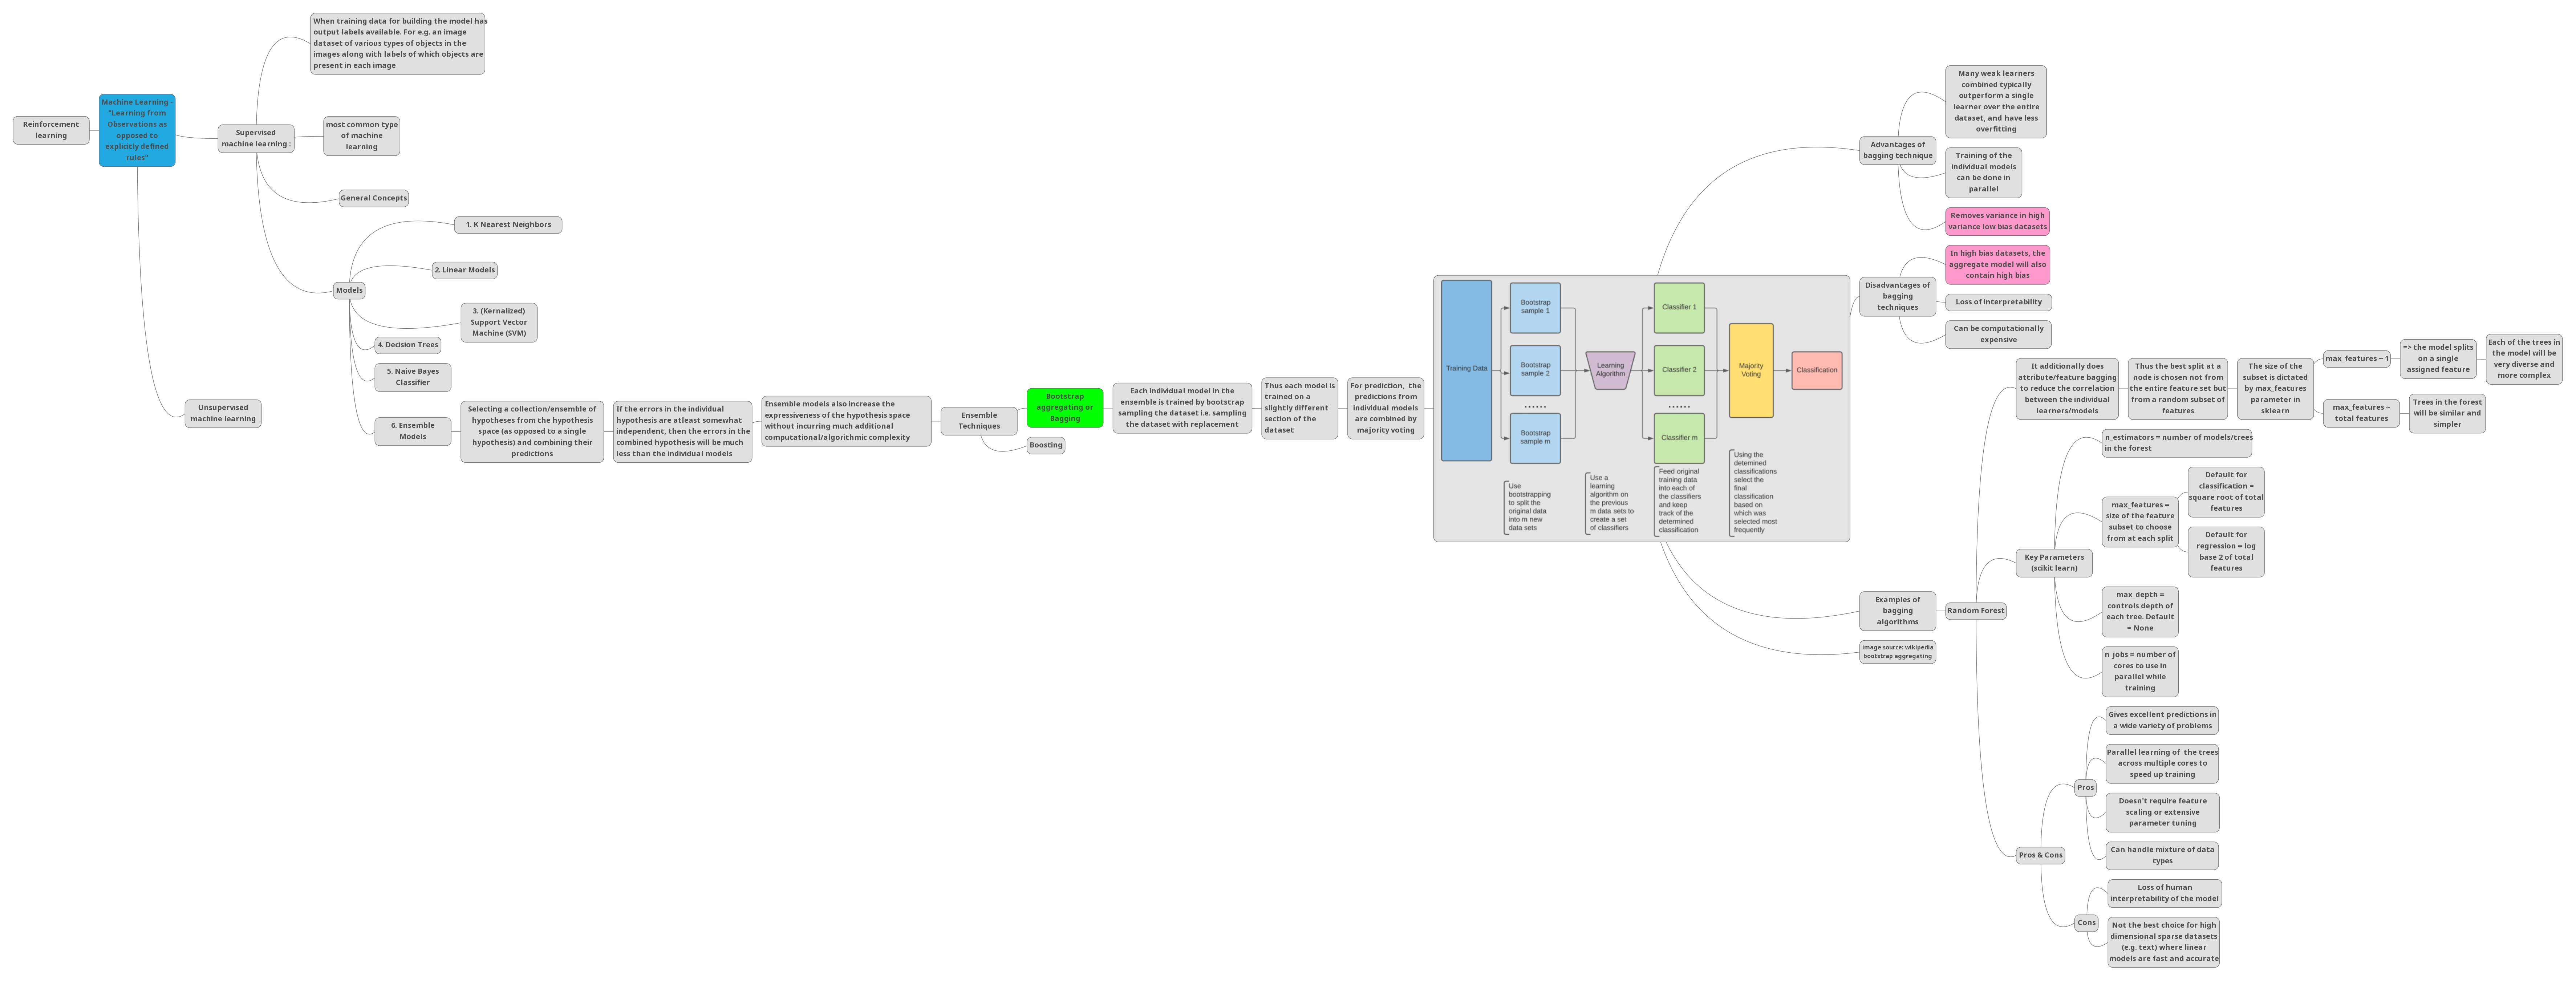

### Boosting 

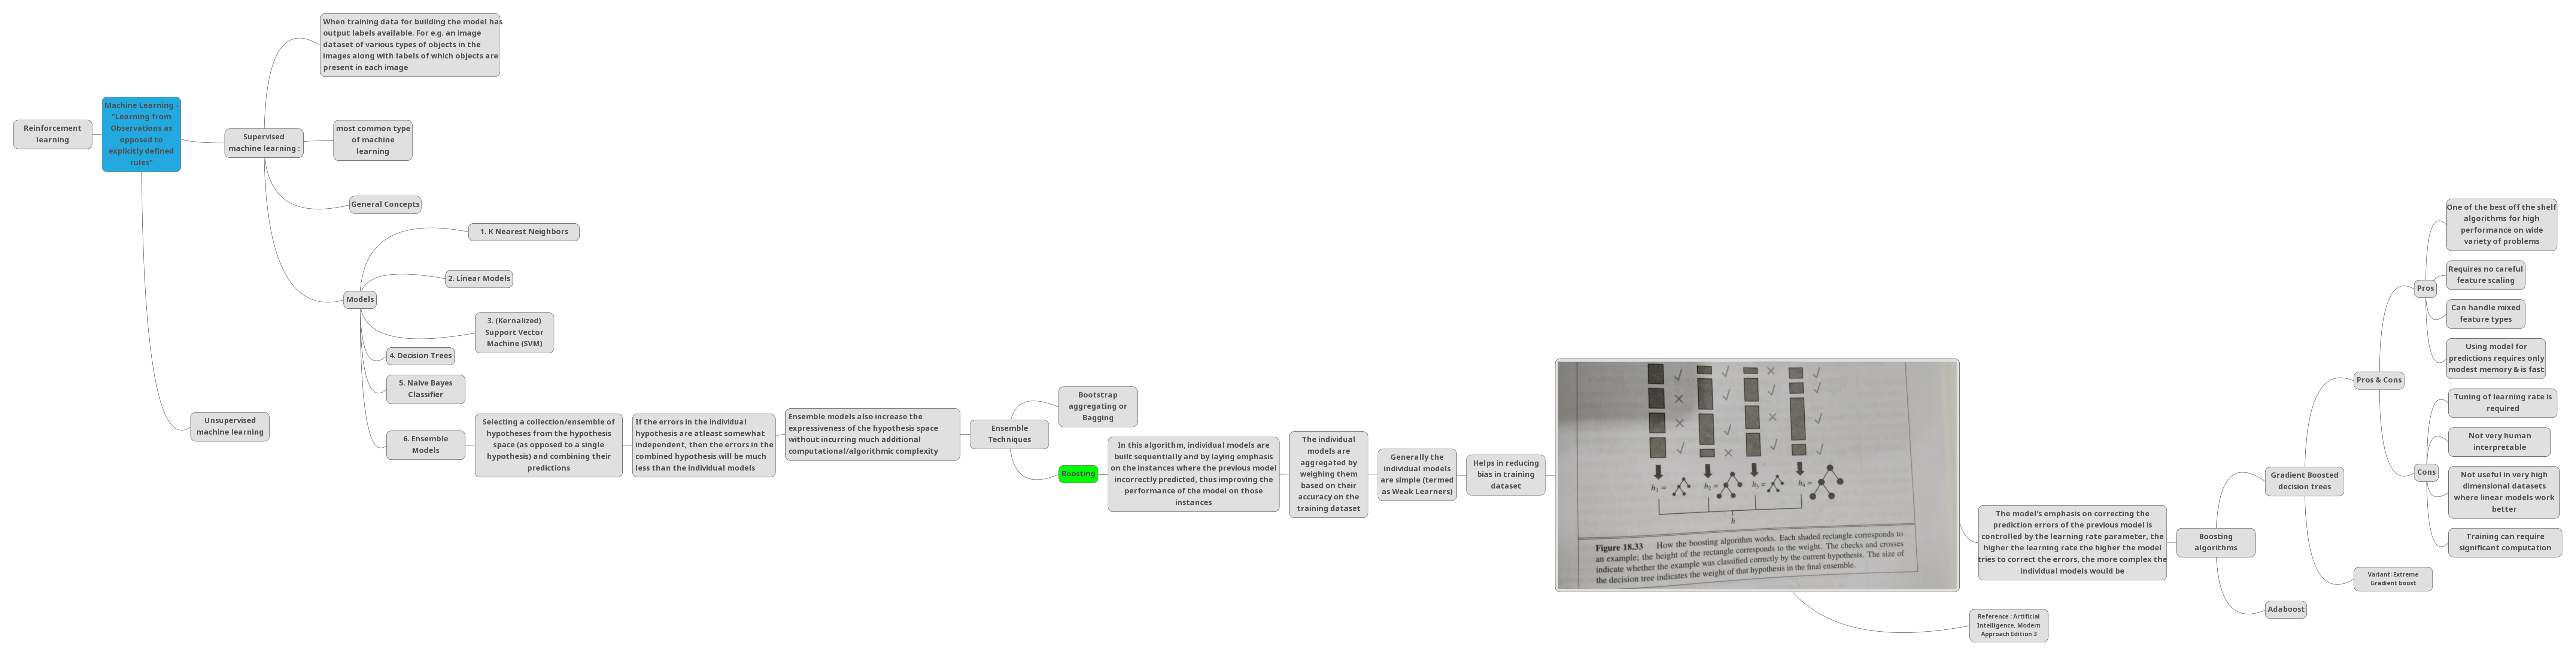

## Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
!cp '/content/drive/MyDrive/Colab Notebooks/MLWithPython/ADSPYCourseStuff/adspy_shared_utilities.py' .
!cp '/content/drive/MyDrive/Colab Notebooks/MLWithPython/ADSPYCourseStuff/fruit_data_with_colors.txt' .

In [6]:
from adspy_shared_utilities import plot_class_regions_for_classifier

## Case studies

## Random Forest

### Synthetic dataset 

In [7]:
X_D2,y_D2 = make_blobs(
    n_features=2,
    n_samples=100,
    random_state=4,
    cluster_std = 1.3,
    centers = 8
)

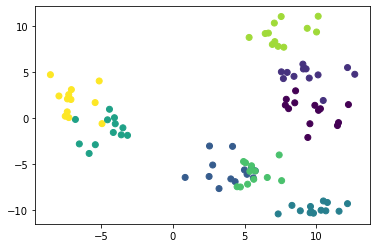

In [8]:
plt.scatter(X_D2[:,0],X_D2[:,1],c=y_D2)

In [9]:
np.unique(y_D2)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [10]:
y_D2 = y_D2 % 2

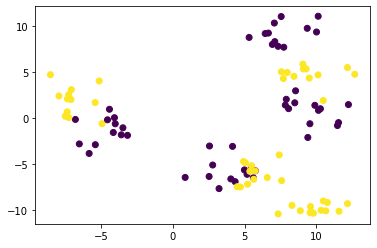

In [11]:
plt.scatter(X_D2[:,0],X_D2[:,1],c=y_D2)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(
    X_D2,
    y_D2,
    random_state = 0
)

In [13]:
RFNonLinData = RandomForestClassifier()

In [14]:
RFNonLinData.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

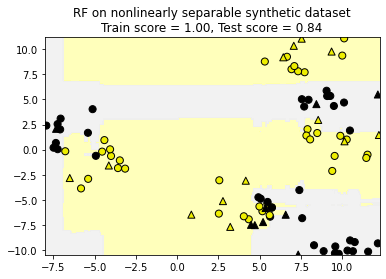

In [15]:
plot_class_regions_for_classifier(RFNonLinData,X_train,y_train,X_test,y_test,title='RF on nonlinearly separable synthetic dataset')

* Clearly the model is overfitting. As it is fitting perfectly on the training data and doing poorly on test data

In [16]:
RFNonLinData2 = RandomForestClassifier(n_estimators=10,max_depth=3)

In [17]:
RFNonLinData2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

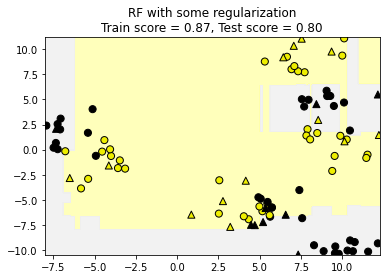

In [18]:
plot_class_regions_for_classifier(RFNonLinData2,X_train,y_train,X_test,y_test,title='RF with some regularization')

* With some regularization, train and test scores are closer than earlier. 
* More fine tuning can be done.

### Fruits Dataset

In [19]:
FruitsData = pd.read_table('fruit_data_with_colors.txt')

In [20]:
FruitsData.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [21]:
features = ['mass','width','height','color_score']

In [22]:
X_fruits,y_fruits = FruitsData[features],FruitsData['fruit_label']

In [23]:
X_fruits.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [24]:
y_fruits.head()

0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X_fruits,y_fruits,random_state = 0)

In [26]:
RFFruits = RandomForestClassifier()

In [27]:
RFFruits.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
print("Classification Accuracy: Training data = {:.2f}".format(RFFruits.score(X_train,y_train)))

Classification Accuracy: Training data = 1.00


In [29]:
print("Classification Accuracy: Test data = {:.2f}".format(RFFruits.score(X_test,y_test)))

Classification Accuracy: Test data = 0.80


* Doing some pruning on the model to reduce overfitting

In [30]:
RFFruits2 = RandomForestClassifier(n_estimators=2,max_depth=4,random_state=0)

In [31]:
RFFruits2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
print("Classification Accuracy: Training data = {:.2f}".format(RFFruits2.score(X_train,y_train)))

Classification Accuracy: Training data = 0.86


In [33]:
print("Classification Accuracy: Test data = {:.2f}".format(RFFruits2.score(X_test,y_test)))

Classification Accuracy: Test data = 0.87


Pruning has helped in reducing disparity between training and validation scores. 

Further fine tuning can be done. 

### Breast Cancer Dataset

In [34]:
from sklearn.datasets import load_breast_cancer

In [35]:
CancerData = load_breast_cancer()

In [36]:
print(CancerData.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [37]:
X_cancer = pd.DataFrame(CancerData.data,columns=CancerData.feature_names)

In [38]:
y_cancer = pd.Series(CancerData.target,name='diagnosis')

In [39]:
y_cancer.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

* For us the recall of malignant tumours is of higher importance, hence we will check the recall (of Class 0) performance of the models we build

In [40]:
X_train,X_test,y_train,y_test = train_test_split(
    X_cancer,y_cancer,random_state = 0
)

In [41]:
RFCancer = RandomForestClassifier()

In [42]:
RFCancer.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
print("Classification Accuracy: Training data = {:.2f}".format(RFCancer.score(X_train,y_train)))

Classification Accuracy: Training data = 1.00


In [44]:
print("Classification Accuracy: Test data = {:.2f}".format(RFCancer.score(X_test,y_test)))

Classification Accuracy: Test data = 0.97


In [45]:
print("Classification Report: \n",classification_report(y_test,RFCancer.predict(X_test)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



* The recall of the class 0 is good. 
* We prune the model for reducing the complexity and bringing training and test scores closer.

In [46]:
RFCancer2 = RandomForestClassifier(n_estimators=20,max_depth=3,random_state=0)

In [47]:
RFCancer2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
print("Classification Accuracy: Training data = {:.2f}".format(RFCancer2.score(X_train,y_train)))

Classification Accuracy: Training data = 0.98


In [49]:
print("Classification Accuracy: Test data = {:.2f}".format(RFCancer2.score(X_test,y_test)))

Classification Accuracy: Test data = 0.97


In [50]:
print("Classification Report: \n",classification_report(y_test,RFCancer2.predict(X_test)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



* TODO: how to get parameter values of the fitted model? (e.g. max_features chosen in this model)

In [51]:
RFCancer2.max_features

'auto'

The scores are closer now and the model is much simpler. 


* Setting the max_features parameters

In [52]:
RFCancer3 = RandomForestClassifier(max_features=8,random_state=0)

In [53]:
RFCancer3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:
print("Classification Accuracy: Training data = {:.2f}".format(RFCancer3.score(X_train,y_train)))

Classification Accuracy: Training data = 1.00


In [55]:
print("Classification Accuracy: Test data = {:.2f}".format(RFCancer3.score(X_test,y_test)))

Classification Accuracy: Test data = 0.97


In [56]:
print("Classification Report: \n",classification_report(y_test,RFCancer3.predict(X_test)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.98      0.98      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



* Slightly better than the earlier model. 

##### Understanding the impact of max_features attribute

In [82]:
RFCancer4 = RandomForestClassifier(max_features=1,random_state=0)

In [83]:
RFCancer4.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [84]:
print("Classification Accuracy: Training data = {:.2f}".format(RFCancer4.score(X_train,y_train)))

Classification Accuracy: Training data = 1.00


In [85]:
print("Classification Accuracy: Test data = {:.2f}".format(RFCancer4.score(X_test,y_test)))

Classification Accuracy: Test data = 0.96


In [86]:
print("Classification Report: \n",classification_report(y_test,RFCancer4.predict(X_test)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



This model is slightly low performance one, as expected through the choice of the max_features & max_depth parameter. 

Plotting some trees from the model

In [87]:
from sklearn import tree

[Text(1027.2272727272727, 1297.2272727272727, 'worst concavity <= 0.366\ngini = 0.459\nsamples = 265\nvalue = [152, 274]\nclass = benign'),
 Text(684.8181818181818, 1173.6818181818182, 'mean radius <= 14.975\ngini = 0.262\nsamples = 192\nvalue = [48, 262]\nclass = benign'),
 Text(456.54545454545456, 1050.1363636363635, 'mean symmetry <= 0.158\ngini = 0.11\nsamples = 167\nvalue = [16, 258]\nclass = benign'),
 Text(405.8181818181818, 926.590909090909, 'gini = 0.0\nsamples = 43\nvalue = [0, 71]\nclass = benign'),
 Text(507.27272727272725, 926.590909090909, 'radius error <= 0.236\ngini = 0.145\nsamples = 124\nvalue = [16, 187]\nclass = benign'),
 Text(456.54545454545456, 803.0454545454545, 'gini = 0.0\nsamples = 36\nvalue = [0, 61]\nclass = benign'),
 Text(558.0, 803.0454545454545, 'mean radius <= 14.415\ngini = 0.2\nsamples = 88\nvalue = [16, 126]\nclass = benign'),
 Text(456.54545454545456, 679.5, 'concavity error <= 0.027\ngini = 0.14\nsamples = 81\nvalue = [10, 122]\nclass = benign'),


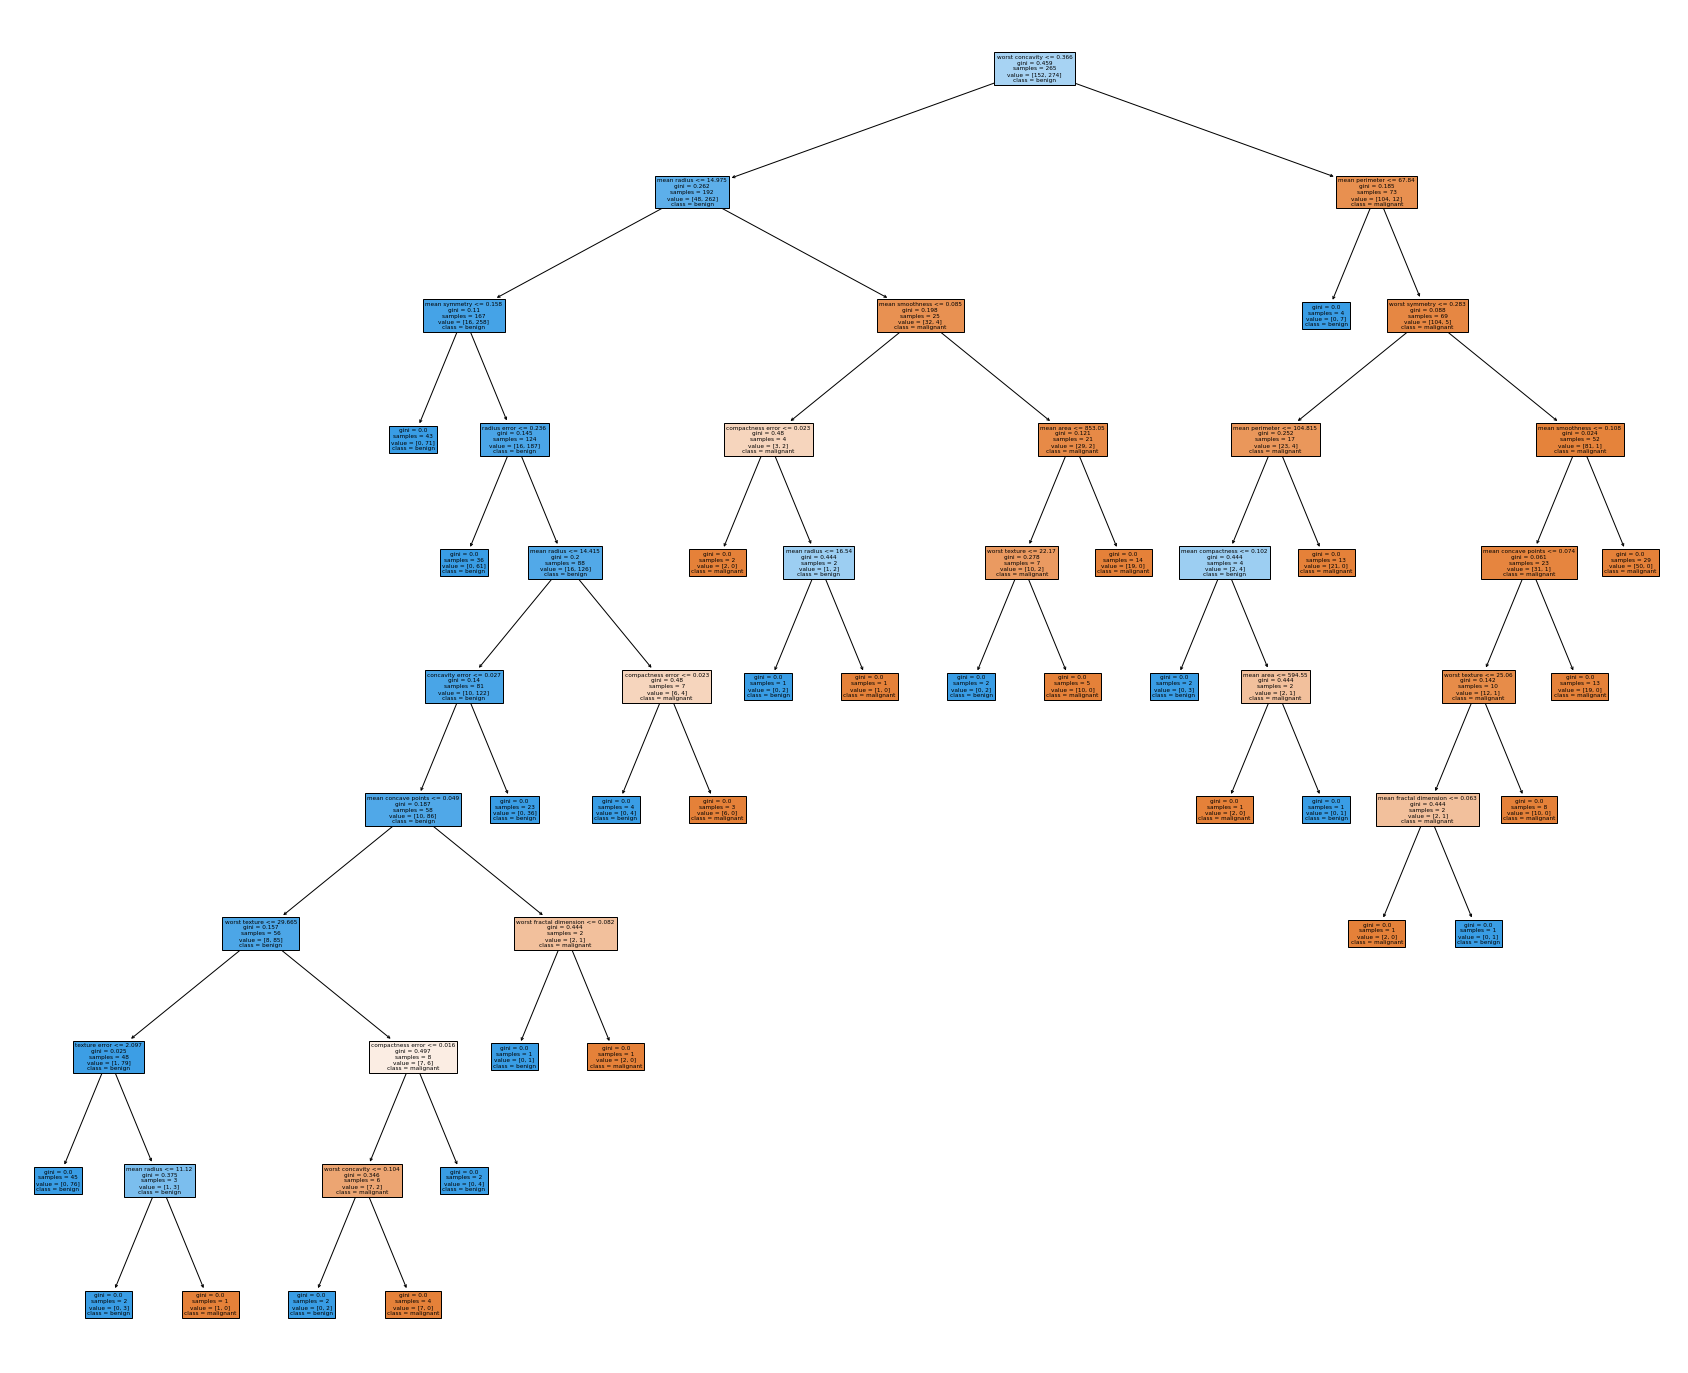

In [91]:
plt.figure(figsize=(30,25))

tree.plot_tree(
    RFCancer4.estimators_[0],
    feature_names = CancerData.feature_names,
    class_names = CancerData.target_names,
    filled=True
)

We see more than 1 features in this super complex tree.

Looking up scikit learn documentation, it says that: " the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features." (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

* However the tree still has fewer features than what it would have had by its default setting due to which its a super complex tree. We compare it with a tree from the first random forest model where we did not tune this parameter. 

[Text(582.2608695652174, 509.625, 'mean radius <= 15.19\ngini = 0.458\nsamples = 264\nvalue = [151, 275]\nclass = benign'),
 Text(400.30434782608694, 441.675, 'worst concave points <= 0.142\ngini = 0.183\nsamples = 185\nvalue = [31, 273]\nclass = benign'),
 Text(254.7391304347826, 373.725, 'worst concavity <= 0.407\ngini = 0.037\nsamples = 158\nvalue = [5, 262]\nclass = benign'),
 Text(181.95652173913044, 305.775, 'worst radius <= 17.625\ngini = 0.022\nsamples = 156\nvalue = [3, 261]\nclass = benign'),
 Text(145.56521739130434, 237.825, 'radius error <= 0.643\ngini = 0.015\nsamples = 155\nvalue = [2, 261]\nclass = benign'),
 Text(72.78260869565217, 169.875, 'area error <= 41.49\ngini = 0.008\nsamples = 152\nvalue = [1, 259]\nclass = benign'),
 Text(36.391304347826086, 101.92500000000001, 'gini = 0.0\nsamples = 150\nvalue = [0, 257]\nclass = benign'),
 Text(109.17391304347825, 101.92500000000001, 'mean texture <= 21.17\ngini = 0.444\nsamples = 2\nvalue = [1, 2]\nclass = benign'),
 Text(

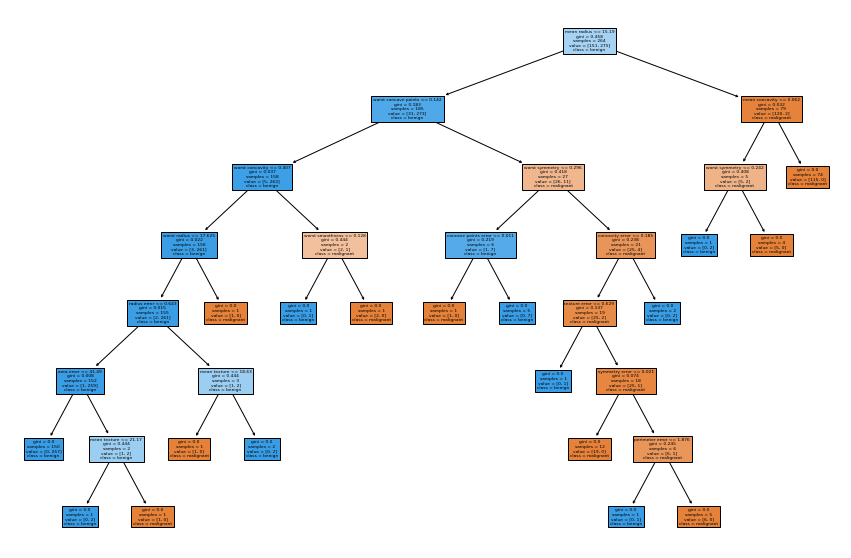

In [89]:
plt.figure(figsize=(15,10))

tree.plot_tree(
    RFCancer.estimators_[0],
    feature_names = CancerData.feature_names,
    class_names = CancerData.target_names,
    filled=True
)

The default setting tree is much less complex since it is choosing from a larger feature set. 



## Gradient Boosted Decision Trees

### Synthetic Dataset

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
    X_D2,
    y_D2,
    random_state = 0
)

In [ ]:
GBNonLinData = GradientBoostingClassifier()

In [ ]:
GBNonLinData.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

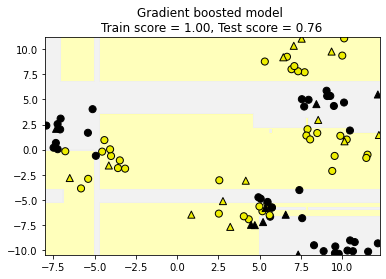

In [ ]:
plot_class_regions_for_classifier(GBNonLinData,X_train,y_train,X_test,y_test,title='Gradient boosted model ')

Plenty of overfitting. We prune the model now.

In [ ]:
GBNonLinData2 = GradientBoostingClassifier(n_estimators=10,max_depth=3,random_state=0)

In [ ]:
GBNonLinData2.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

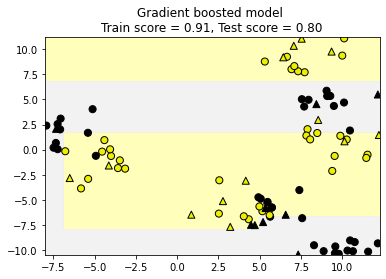

In [ ]:
plot_class_regions_for_classifier(GBNonLinData2,X_train,y_train,X_test,y_test,title='Gradient boosted model ')

Much better decision boundaries and closer training and validation scores. 

Further fine tuning can be done.

### Fruits dataset 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_fruits,y_fruits,random_state=0)

In [ ]:
GBFruits = GradientBoostingClassifier()

In [ ]:
GBFruits.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print("GB Accuracy (training data) = {:.2f}".format(GBFruits.score(X_train,y_train)))

GB Accuracy (training data) = 1.00


In [ ]:
print("GB Accuracy (testing data) = {:.2f}".format(GBFruits.score(X_test,y_test)))

GB Accuracy (testing data) = 0.80


Reducing the overfitting and model complexity with some regularization

In [ ]:
GBFruits2 = GradientBoostingClassifier(n_estimators=6,max_depth=2,random_state=0
                                      )

In [ ]:
GBFruits2.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=6,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print("GB Accuracy (training data) = {:.2f}".format(GBFruits2.score(X_train,y_train)))

GB Accuracy (training data) = 0.98


In [ ]:
print("GB Accuracy (testing data) = {:.2f}".format(GBFruits2.score(X_test,y_test)))

GB Accuracy (testing data) = 0.87


Slightly better test data score with some complexity reduction. Further fine tuning can be done.

### Breast Cancer Dataset 

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)

In [93]:
GBCancer = GradientBoostingClassifier()
GBCancer.fit(X_train,y_train)
print("Train Score = {:.2f}".format(GBCancer.score(X_train,y_train)))
print("Test Score = {:.2f}".format(GBCancer.score(X_test,y_test)))

Train Score = 1.00
Test Score = 0.97


* Some complexity reduction on the model now

In [96]:
GBCancer2 = GradientBoostingClassifier(n_estimators=6,random_state=0)
GBCancer2.fit(X_train,y_train)
print("Train Score = {:.2f}".format(GBCancer2.score(X_train,y_train)))
print("Test Score = {:.2f}".format(GBCancer2.score(X_test,y_test)))

Train Score = 0.98
Test Score = 0.97


Better matching scores. We also look at the recall of class 0. 

In [97]:
print(classification_report(y_test,GBCancer2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



Recall of class 0 is good. 



#### Tweaking the learning rate parameter

We can also reduce model complexity by reducing the learning rate. When the learning rate is less, the model tries less hard in correcting the mistakes of the previous model. 

In [98]:
GBCancer3 = GradientBoostingClassifier(learning_rate=0.01,max_depth=2,random_state=0)
GBCancer3.fit(X_train,y_train)
print("Train Score = {:.2f}".format(GBCancer3.score(X_train,y_train)))
print("Test Score = {:.2f}".format(GBCancer3.score(X_test,y_test)))

Train Score = 0.97
Test Score = 0.97


In [99]:
print(classification_report(y_test,GBCancer3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.96      0.99      0.97        90

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



Recall of class 0 is slightly less in this model, but further tuning can be done. 


#### Reading & Resources:

1. Great reading on ensemble techniques: https://www.cc.gatech.edu/~hic/CS7616/pdf/lecture5.pdf

Most of the code and content from:
2.  Applied Machine Learning in Python Coursera Course 

3. Artificial Intelligence, A Modern Approach (Edition 3)